the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/tmp/ipykernel_10898/2209663916.py:26: RuntimeWarning: Mean of empty slice
  combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)


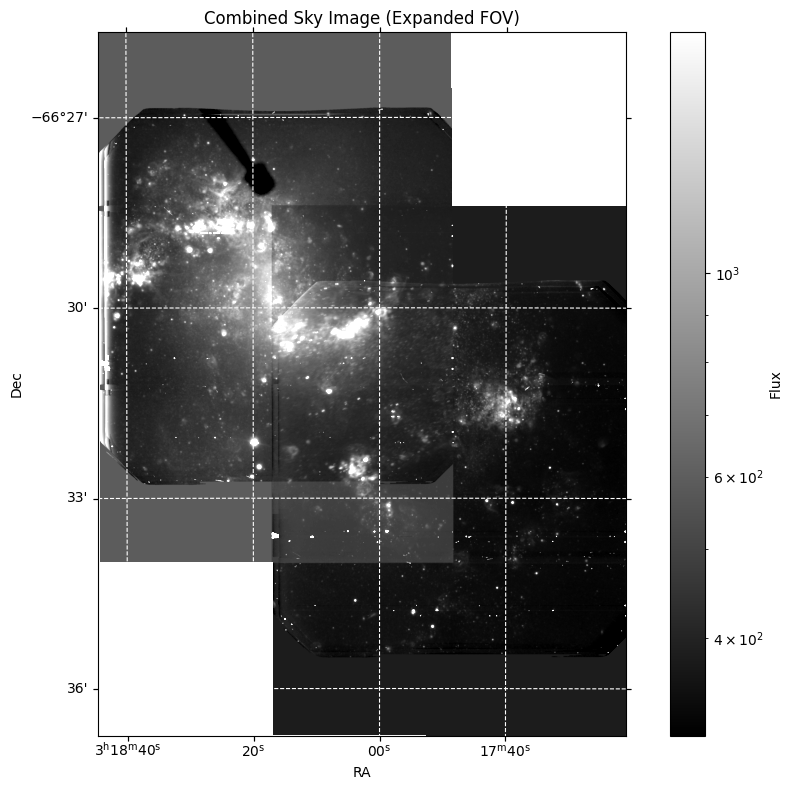

In [36]:
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# Load both FITS files
hdul1 = fits.open('../mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Compute an output WCS and shape that includes both images
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])

# Reproject both images onto the common WCS
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)

# Combine the two images (e.g., average, sum, max)
combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)
combined = np.where(combined > 0, combined, np.nan)  # Safe for LogNorm

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=new_wcs)
norm = LogNorm(vmin=np.nanpercentile(combined, 1), vmax=np.nanpercentile(combined, 99))
im = ax.imshow(combined, origin='lower', cmap='gray', norm=norm)
ax.set_title('Combined Sky Image (Expanded FOV)')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.grid(color='white', ls='--')

plt.colorbar(im, ax=ax, label='Flux')
plt.tight_layout()
plt.show()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/tmp/ipykernel_10898/1632150316.py:30: RuntimeWarning: Mean of empty slice
  combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)


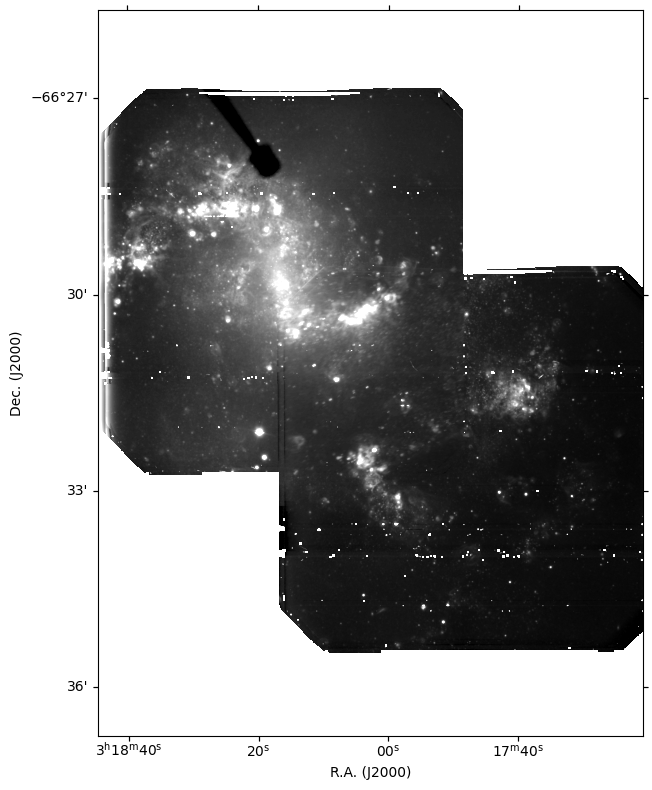

In [37]:
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# Load both FITS files
hdul1 = fits.open('../mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Replace specific values with NaN
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# Compute an output WCS and shape that includes both images
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])

# Reproject both images onto the common WCS
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)

# Combine the two images (e.g., average)
combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)
combined = np.where(combined > 0, combined, np.nan)  # Optional: mask non-positive values

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=new_wcs)
norm = LogNorm(vmin=np.nanpercentile(combined, 1), vmax=np.nanpercentile(combined, 99))
im = ax.imshow(combined, origin='lower', cmap='gray', norm=norm)
#ax.set_title('Combined Sky Image (Expanded FOV)')
ax.set_xlabel('R.A. (J2000)')
ax.set_ylabel('Dec. (J2000)')
#ax.set_ylim(-66.60, -66.45)

#ax.grid(color='white', ls='--')
#plt.colorbar(im, ax=ax, label='Flux')
plt.tight_layout()
plt.show()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/tmp/ipykernel_10898/841749523.py:38: RuntimeWarning: Mean of empty slice
  combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)


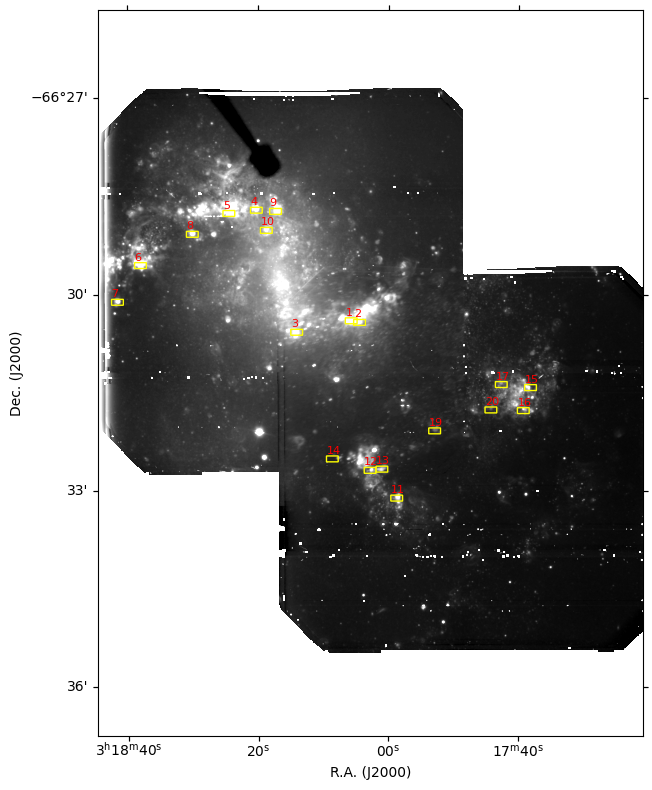

In [38]:
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd

# --- Parámetros de las regiones ---
regions_file = '../../TESIS/analysis_gmos/output_scarano.csv'  # CSV con columnas: ID, RA, DEC
width_deg  = 0.0075  # Ancho del rectángulo en grados (ajusta a tus slits)
height_deg = 0.0015  # Alto del rectángulo en grados
# -----------------------------------

# Carga de datos FITS
hdul1 = fits.open('../mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1  = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2  = WCS(hdul2['SCI'].header)

# Enmascarar valores concretos
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# WCS y forma común
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])

# Reproyección
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)

# Combinación
combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)
combined = np.where(combined > 0, combined, np.nan)

# Leer regiones desde CSV
df_reg = pd.read_csv(regions_file)  # espera columnas ID, RA, DEC

# Plot
fig = plt.figure(figsize=(10, 8))
ax  = fig.add_subplot(111, projection=new_wcs)

norm = LogNorm(vmin=np.nanpercentile(combined, 1),
               vmax=np.nanpercentile(combined, 99))
ax.imshow(combined, origin='lower', cmap='gray', norm=norm)

ax.set_xlabel('R.A. (J2000)')
ax.set_ylabel('Dec. (J2000)')

# Añadir cada slit como rectángulo y su ID
for _, row in df_reg.iterrows():
    ra, dec = row['RA'], row['DEC']
    # Rectángulo en coordenadas de cielo
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='yellow', facecolor='none', lw=1.0,
        transform=ax.get_transform('world')
    )
    ax.add_patch(rect)
    # Texto al lado
    ax.text(
        ra + width_deg/2, dec + height_deg/2, str(row['ID']),
        color='red', fontsize=8,
        transform=ax.get_transform('world'),
        va='bottom', ha='left'
    )
#plt.ylim(-66.45, -66.60)
plt.tight_layout()
plt.show()


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/tmp/ipykernel_10898/3071017226.py:43: RuntimeWarning: Mean of empty slice
  combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)


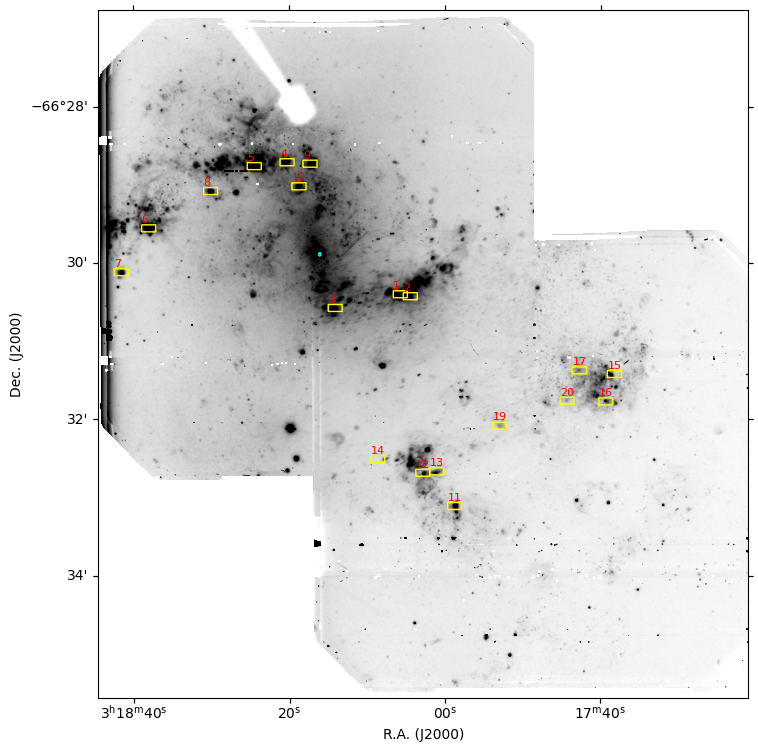

In [66]:
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle, Circle
import numpy as np
import pandas as pd

# --- Parámetros de las regiones ---
regions_file = '../../TESIS/analysis_gmos/output_scarano.csv'  # CSV con columnas: ID, RA, DEC
width_deg  = 0.0075  # Ancho del rectángulo en grados (ajusta a tus slits)
height_deg = 0.0015  # Alto del rectángulo en grados
# -----------------------------------

# Coordenadas centrales para el círculo azul
ra_center  = 49.566875
dec_center = -66.498250
circle_radius_deg = 0.0002  # ajusta el radio a tu gusto (en grados)

# Carga de datos FITS
hdul1 = fits.open('../mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1  = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2  = WCS(hdul2['SCI'].header)

# Enmascarar valores concretos
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# WCS y forma común
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])

# Reproyección
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)

# Combinación
combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)
combined = np.where(combined > 0, combined, np.nan)

# Leer regiones desde CSV
df_reg = pd.read_csv(regions_file)  # espera columnas ID, RA, DEC

# Plot
fig = plt.figure(figsize=(10, 8))
ax  = fig.add_subplot(111, projection=new_wcs)

norm = LogNorm(vmin=np.nanpercentile(combined, 1),
               vmax=np.nanpercentile(combined, 99))
ax.imshow(combined, origin='lower', cmap='gray_r', norm=norm)
# ax.plot(ra_center, dec_center,'b.')
ax.set_xlabel('R.A. (J2000)')
ax.set_ylabel('Dec. (J2000)')

# Añadir cada slit como rectángulo y su ID
for _, row in df_reg.iterrows():
    ra, dec = row['RA'], row['DEC']
    rect = Rectangle(
        (ra - width_deg/2, dec - height_deg/2),
        width_deg, height_deg,
        edgecolor='yellow', facecolor='none', lw=1.0,
        transform=ax.get_transform('world')
    )
    ax.add_patch(rect)
    ax.text(
        ra + width_deg/2, dec + height_deg/2, str(row['ID']),
        color='red', fontsize=8,
        transform=ax.get_transform('world'),
        va='bottom', ha='left'
    )

#Añadir círculo azul en ra_center, dec_center
circle = Circle(
    (ra_center, dec_center),
    radius=circle_radius_deg,
    edgecolor='cyan', facecolor='none', lw=2.,
    transform=ax.get_transform('world')
)
ax.add_patch(circle)
ymin, ymax = ax.get_ylim()
plt.ylim(440, 3740)
plt.tight_layout()
plt.show()